In [246]:
import numpy as np
import pandas as pda
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [247]:
dataset = pda.read_csv('/microchip.csv')

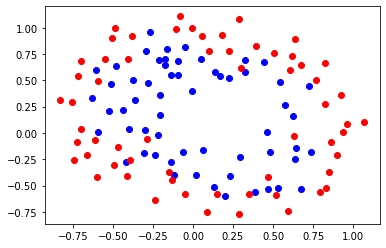

In [248]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
# print(X)
# print(Y)
fig, ax = plt.subplots() 
for i in range(len(X)):
    if Y[i] == 1:
        ax.plot(X[i][0], X[i][1], marker='o',color='b')
    else:
        ax.plot(X[i][0], X[i][1], marker='o',color='r')
        

In [249]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=81)

In [250]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

**3 more feature added**

In [251]:
train_added = []
test_added = []

for i in range(len(X_train)):
    train_added.append([X_train[i][0]**2,X_train[i][1]**2,X_train[i][0]*X_train[i][1]])
for i in range(len(X_test)):
    test_added.append([X_test[i][0]**2,X_test[i][1]**2,X_test[i][0]*X_test[i][1]])

X_train = np.concatenate((X_train,train_added),axis=1)
X_test = np.concatenate((X_test,test_added),axis=1)

In [252]:
minni = np.min(X_train,axis=0)
maxxi = np.max(X_train,axis=0)
X_train = (X_train - minni)/(maxxi - minni)
minni = np.min(X_test,axis=0)
maxxi = np.max(X_test,axis=0)
X_test = (X_test - minni)/(maxxi - minni)

In [253]:
X_one = []
X_zero = []

for i in range(len(Y_train)):
    if Y_train[i] == 1:
        X_one.append([X_train[i][0],X_train[i][1],X_train[i][2],X_train[i][3],X_train[i][4]])
    else:
        X_zero.append([X_train[i][0],X_train[i][1],X_train[i][2],X_train[i][3],X_train[i][4]])

In [254]:
summa1 = np.sum(np.matrix(X_zero),axis = 0)/len(X_zero)
summa2 = np.sum(np.matrix(X_one),axis = 0)/len(X_one)
# print(summa1)
# print(summa2)

**sigma calculation**

In [255]:
sigma = np.zeros((5,5))
sigma0 = np.zeros((5,5))
sigma1 = np.zeros((5,5))
count = 0
for i in range(len(X_train)):
    if(Y_train[i] == 1):
        sigma1 += np.dot(np.transpose(X_train[i]-summa2),X_train[i]-summa2)
    else:
        sigma0 += np.dot(np.transpose(X_train[i]-summa1),X_train[i]-summa1)
sigma = (sigma1 + sigma0)/X_train.shape[0]
sigma0 /= len(X_one)
sigma1 /= len(X_zero)

**probablity fun**

In [256]:
def probablity_fun(x,mu,sigma):
    m = len(x)
    if m == mu.shape[1] and (m,m) == sigma.shape:
        deter = np.linalg.det(sigma)
        
        temp = 1.0/(np.power((2*np.pi),float(m)/2)*np.power(deter,1.0/2))
        xmu = np.matrix(x-mu)
        siginv = inv(sigma)
        res = np.power(np.e,-0.5*(np.dot(np.dot(xmu,siginv),np.transpose(xmu))))
        return res*temp

**Y Predictions**

In [257]:
Y_predicted = []
for x in X_test:
    pa = probablity_fun(x,np.squeeze(summa1),np.matrix(sigma0))
    pc = probablity_fun(x,np.squeeze(summa2),np.matrix(sigma1))
    if (pa<pc):
        Y_predicted.append(1)
    else:
        Y_predicted.append(0)

**Accuracy Calculations**

In [258]:

for i in range(len(Y_test)):
    if(Y_predicted[i]==Y_test[i]):
        count = count + 1
accuracy = np.multiply(np.divide(count,len(Y_test)),100)

print("Accuracy : ", accuracy)
print("Actual match : ",count,"/",len(Y_test))

Accuracy :  72.22222222222221
Actual match :  26 / 36


**Confusion Matrix**

In [259]:
print("Confusion Matrix")
confusion_matrix(Y_test,Y_predicted)

Confusion Matrix


array([[15,  3],
       [ 7, 11]])